<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#beta-div-PCoA-PCs" data-toc-modified-id="beta-div-PCoA-PCs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>beta div PCoA PCs</a></span><ul class="toc-item"><li><span><a href="#Format" data-toc-modified-id="Format-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Format</a></span></li><li><span><a href="#checks" data-toc-modified-id="checks-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>checks</a></span></li></ul></li><li><span><a href="#Host-tree-subsample" data-toc-modified-id="Host-tree-subsample-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Host tree subsample</a></span></li><li><span><a href="#PGLS" data-toc-modified-id="PGLS-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>PGLS</a></span><ul class="toc-item"><li><span><a href="#Digestive-system" data-toc-modified-id="Digestive-system-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Digestive system</a></span><ul class="toc-item"><li><span><a href="#Saving-output" data-toc-modified-id="Saving-output-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Saving output</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Diet" data-toc-modified-id="Diet-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Diet</a></span><ul class="toc-item"><li><span><a href="#Saving-output" data-toc-modified-id="Saving-output-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Saving output</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#significant-values" data-toc-modified-id="significant-values-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>significant values</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* PGLS to assess alpha diversity associations with diet or digestive systems

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS/'

# microbiome
## 16S-arch phyloseq object (one sample per individual)
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD_clr-genus.RDS'

# diversity
beta_div_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/diversity-qiime2/beta_div_genus.RDS'

# host tree
host_tree_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_200429_16S-arch_IndD.nwk'

# misc params
threads = 8
my_seed = 8394

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)

library(ape)
library(ade4)
library(caper)
library(phyloseq)

library(doParallel)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘caper’ was built under R version 3.6.3”
Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: mvtnorm

Warning message:
“package ‘mvtnorm’ was built under R version 3.6.3”
Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [3]:
df.dims()
set.seed(my_seed)
make_dir(work_dir)
RhpcBLASctl::blas_set_num_threads(1)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS/ 


# Load

In [4]:
# phyloseq obj.
physeq = readRDS(physeq_arch_IndD_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 57 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 57 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 57 tips and 56 internal nodes ]

In [5]:
# otu table
otu = physeq %>%
    phyloseq2df(otu_table) %>%
    as.data.frame
rownames(otu) = otu$OTU
otu$OTU = NULL
otu = otu %>% t %>% as.data.frame
otu

,c3b19986023201183d07b2bf6dc9eaab,e6ddd5efa2e9229aa04f33e832450fa8,5887dc080d027d30580310a1eb1f3166,c0eb38cd52d8be27c54de8a8b06f9a9a,bfb96cf07d2fec50b18d3a9665ba6e80,66cc60d5322fdeaf48cc8bdd82effea2,f906aca9a9c84f01cbd8a874cce7e6fe,1936b1a270b058c5754be0addc7c7c31,252850216e7d0123bfafd7eed609799d,7950a70a07006f7c7b0c6f02c46a93af,⋯,092547e9f87986180c27587156336bcb,2987f396047df01622b365b3b667a4eb,fef8ef65bd3598e9f1fec3bd32a9b4bd,b9abd819fdd733c57642461d1c2247a6,75f3ea1df98051a1b49107173aa51a32,1578a874797e43b052a66b2fb5ef9e4a,b7ed842d3fbe5d8d33504a0a765409ae,1f1f87cab902b66753b8bbd81e69a7d4,250a31c11dbecf1e2ef705424fdaa7a7,188795b8eb1edbd3334be2676ca05391
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F14_Common_Bream,0.3533185,0.32246438,2.91428908,0.3254381,0.3703154,0.3612832,0.30778200,0.27413385,0.3629528,0.29043538,⋯,0.1665158,-0.03874821,0.4547095,0.2546676,0.73849765,-2.920287,-3.236448,-2.117767,8.7026399,0.4149247
F35_Red_Deer,0.0982570,0.06740287,0.04961681,4.4809734,0.1152539,0.1062217,0.05272048,0.01907233,0.1078913,0.03537386,⋯,2.7692054,-0.64532655,-0.1518688,-0.3519108,0.03596791,1.275840,-3.843026,3.204286,-0.3493636,-0.1916536
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,0.1988029,0.1679488,0.1501628,0.1709225,0.2157999,0.2067676,0.1532664,0.1196183,0.2084372,0.1359198,⋯,3.234569,-0.3855593,0.1078984,4.675893,0.5839821,-2.158147,-3.583259,-2.46457812,-0.08959639,0.0681136
X67_European_Roe,-0.4190308,-0.4498850,-0.4676710,-0.4469112,-0.4020339,-0.4110661,-0.4645673,-0.4982155,-0.4093965,-0.4819140,⋯,-2.166684,-1.5943665,-1.1009088,-1.300951,-0.9130721,1.004511,-4.792066,-0.03111916,-1.29840360,-1.1406936


In [6]:
# metadata
metadata = physeq %>% 
    phyloseq2df(sample_data) %>%
    mutate(scientific_name = gsub(' ', '_', scientific_name),
           digestive_system = gsub('fermentation activity ', '', digestive_system),
           dig_sys = gsub('simple ', '', digestive_system)) %>%
    as.data.frame
rownames(metadata) = metadata$SampleID
metadata 

,SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,i.CH4_L.d_mean,i.CH4_L.d_sd,i.CH4_L.kgBM_mean,i.CH4_L.kgBM_sd,i.CH4_g.d_mean,i.CH4_g.d_sd,i.CH4_kJ.d_mean,i.CH4_kJ.d_sd,Sample,dig_sys
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
F14_Common_Bream,F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,F14_Common_Bream,simple
F35_Red_Deer,F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,52.24132,27.18306,0.4858472,0.1686955,38.67117,21.30162,2066.942,1075.505,F35_Red_Deer,foregut
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,X431_Quagga,431,Steppenzebra,Quagga,Equus_quagga,NA,89252,Mammalia,Perissodactyla,Equidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,X431_Quagga,hindgut
X67_European_Roe,X67_European_Roe,67,Reh,European.Roe,Capreolus_capreolus,NA,9858,Mammalia,Artiodactyla,Cervidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,X67_European_Roe,foregut


In [7]:
# beta diversity calculated by QIIME2 (rarefaction)
beta_div = readRDS(beta_div_file) 
beta_div %>% length

[1] 4

In [8]:
# host phylogeny
host_tree = read.tree(host_tree_IndD_file)
host_tree


Phylogenetic tree with 185 tips and 184 internal nodes.

Tip labels:
	X60_European_Chub, X179_Roach, X330_Ide, X327_Silver_Bream, X326_Silver_Bream, F14_Common_Bream, ...
Node labels:
	, @_20_@, @_17_@, @_14_@, @_9_@, @_15_@, ...

Rooted; includes branch lengths.

# beta div PCoA PCs

In [56]:
pcoa = function(id, dist_list, k=5){
    # making PCoA plot 
    # id = list name
    # dist_list = list of distance matrixes
    # make_plt = create plot?
    
    d = dist_list[[id]]
    # using cmdscale for getting PCoA 
    r = cmdscale(d, eig=TRUE, k=k)
    df = as.data.frame(r$points)
    df$Sample = rownames(df)
    df$dist = id
    return(df)
}

In [57]:
PCs = plyr::llply(names(beta_div), pcoa, dist_list=beta_div) %>%
    do.call(rbind, .)
colnames(PCs) = gsub('^V', 'PC', colnames(PCs))
PCs

,PC1,PC2,PC3,PC4,PC5,Sample,dist
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
F14_Common_Bream,0.1208262,-0.2262896,-0.3035369,0.10187296,0.03771982,F14_Common_Bream,bray_curtis
F35_Red_Deer,-0.2981791,-0.1792220,0.2009252,-0.01909055,0.03321149,F35_Red_Deer,bray_curtis
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga3,1.5130192,-0.142210002,-0.35478443,-0.18108222,-0.19320644,X431_Quagga,weighted_unifrac
X67_European_Roe3,-0.4745075,0.005165221,0.05367902,-0.06638933,-0.08896124,X67_European_Roe,weighted_unifrac


## Format

In [58]:
diet_vars = c(
'SampleID',
'diet',
'diet_vertebrate',
'diet_invertebrate',
'diet_fruit',
'diet_flowers_nectar_pollen',
'diet_leaves_branches_bark_buds',
'diet_seeds',
'diet_grass_waterplants',
'diet_roots_tubers',
'digestive_system',
'dig_sys'
)

PCs = PCs %>%
    inner_join(metadata[,diet_vars], c('Sample'='SampleID'))
PCs

PC1,PC2,PC3,PC4,PC5,Sample,dist,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers,digestive_system,dig_sys
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0.1208262,-0.2262896,-0.3035369,0.10187296,0.03771982,F14_Common_Bream,bray_curtis,omnivore,no,yes,no,no,no,no,yes,no,simple,simple
-0.2981791,-0.1792220,0.2009252,-0.01909055,0.03321149,F35_Red_Deer,bray_curtis,herbivore,no,no,yes,no,yes,yes,yes,yes,foregut,foregut
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.5130192,-0.142210002,-0.35478443,-0.18108222,-0.19320644,X431_Quagga,weighted_unifrac,herbivore,no,no,no,no,no,yes,yes,no,hindgut,hindgut
-0.4745075,0.005165221,0.05367902,-0.06638933,-0.08896124,X67_European_Roe,weighted_unifrac,herbivore,no,no,yes,no,yes,yes,yes,no,foregut,foregut


In [60]:
# encoding diet vars as numeric
PCs$diet = case_when(PCs$diet == 'herbivore' ~ 1,
                     PCs$diet == 'omnivore' ~ 0.5,
                     PCs$diet == 'carnivore' ~ 0)

PCs$digestive_system = case_when(PCs$digestive_system == 'hindgut' ~ 0,
                                 PCs$digestive_system == 'simple hindgut' ~ 0.25,
                                 PCs$digestive_system == 'simple' ~ 0.5,
                                 PCs$digestive_system == 'simple foregut' ~ 0.75,
                                 PCs$digestive_system == 'foregut' ~1)


PCs$dig_sys = case_when(PCs$dig_sys == 'hindgut' ~ 0,
                        PCs$dig_sys == 'simple' ~ 0.5,
                        PCs$dig_sys == 'foregut' ~1)

vars = c(
'diet_vertebrate',
'diet_invertebrate',
'diet_fruit',
'diet_flowers_nectar_pollen',
'diet_leaves_branches_bark_buds',
'diet_seeds',
'diet_grass_waterplants',
'diet_roots_tubers'
)

for(x in vars){
    PCs[,x] = gsub(' .+', '', PCs[,x])
    PCs[,x] = ifelse(PCs[,x] == 'yes', 1, 0) %>% as.numeric
}

PCs$taxa = rownames(PCs)
PCs

PC1,PC2,PC3,PC4,PC5,Sample,dist,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers,digestive_system,dig_sys,taxa
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.1208262,-0.2262896,-0.3035369,0.10187296,0.03771982,F14_Common_Bream,bray_curtis,0.5,0,1,0,0,0,0,1,0,0.5,0.5,1
-0.2981791,-0.1792220,0.2009252,-0.01909055,0.03321149,F35_Red_Deer,bray_curtis,1.0,0,0,1,0,1,1,1,1,1.0,1.0,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.5130192,-0.142210002,-0.35478443,-0.18108222,-0.19320644,X431_Quagga,weighted_unifrac,1,0,0,0,0,0,1,1,0,0,0,739
-0.4745075,0.005165221,0.05367902,-0.06638933,-0.08896124,X67_European_Roe,weighted_unifrac,1,0,0,1,0,1,1,1,0,1,1,740


In [61]:
# checking values
colSums(PCs[,1:5])

PC1           PC2           PC3           PC4           PC5 
 8.243840e-15  2.410908e-14 -2.295429e-14 -3.985701e-14  2.168925e-14

## checks

In [62]:
overlap(PCs$Sample, host_tree$tip.label)

intersect(x,y): 110 
setdiff(x,y): 75 
setdiff(y,x): 0 
union(x,y): 185 


In [63]:
# ordering
#PCs = PCs[host_tree$tip.label,]
#PCs

# Host tree subsample

In [64]:
# replicate analyses with different subsets of the host phylogeny
n_reps = 100

In [65]:
#' randomly selecting one per group
tree_subsample = function(L, df, tree){
    # get subsample (note: subsampling within each species)
    to_keep = df %>% 
        group_by(scientific_name) %>% 
        sample_n(1) %>%
        .$sample
    # subsampling tree
    to_rm = setdiff(tree$tip.label, to_keep)
    tree = drop.tip(tree, to_rm)
    return(tree)
}

In [66]:
# permuted trees
df = metadata %>%
    mutate(sample = SampleID) %>%
    dplyr::select(sample, scientific_name) 

doParallel::registerDoParallel(threads)
host_tree_l = plyr::llply(as.list(1:n_reps), 
                          function(x) tree_subsample(x, df, host_tree),
                          .parallel=TRUE)
host_tree_l %>% length

[1] 100

In [67]:
# check tips per tree
lapply(host_tree_l, function(x) x$tip.label %>% length) %>% unlist %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  81.00   84.00   86.00   86.65   89.25   94.00 

In [77]:
beta_dists = PCs$dist %>% unique
beta_dists

[1] "bray_curtis"        "jaccard"            "unweighted_unifrac"
[4] "weighted_unifrac"

# PGLS

In [68]:
pgls_each_var = function(y, x, tree, data, dist){
    # formatting data
    data = data[data$dist == dist,]
    rownames(data) = data$Sample
    data = data[tree$tip.label,]
    cdat = comparative.data(data=data, phy=tree, names.col="Sample")
    # PGLS
    f = as.formula(paste(c(y, x), collapse=' ~ '))
    mod = pgls(f, cdat) %>% summary
    # formatting output
    df = mod$coefficients %>% as.data.frame
    colnames(df) = c('Estimate', 'std_err', 't_value', 'p_value')
    df$R2 = mod$adj.r.squared %>% as.vector %>% .[1]
    df$x = x
    df$y = y
    df = df[2,] %>% as.data.frame
    return(df)
}

In [69]:
# #-- debug --#
rep = 1
host_tree = host_tree_l[[rep]]
df = otu[host_tree$tip.label,] 

pgls_each_var(y = 'PC1',
              x = 'diet',
              tree = host_tree,
              data = PCs,
              dist = 'bray_curtis')

,Estimate,std_err,t_value,p_value,R2,x,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
diet,-0.3643992,0.1182125,-3.082577,0.002785269,0.0919143,diet,PC1


In [102]:
#' PGLS on each tree
pgls_each_tree = function(rep, y, x, tree_list, data, dist, threads=1){
    tree = tree_list[[rep]]
    
    doParallel::registerDoParallel(threads)
    ret = plyr::llply(as.list(y),
                      pgls_each_var,
                      x = x,
                      tree = tree,
                      data = data,
                      dist = dist,
                      .parallel = TRUE)
    ret = do.call(rbind, ret)
    ret$rep = rep
    return(ret)
}

In [103]:
#-- debug --#
y = colnames(PCs)[1:2]
ret = pgls_each_tree(1,
                     y = y,
                     x = 'diet',
                     tree_list = host_tree_l,
                     data = PCs,
                     dist = 'bray_curtis',
                     threads = threads)

#ret = do.call(rbind, ret) %>%
#    as.data.frame
#colnames(ret) = y

ret 

,Estimate,std_err,t_value,p_value,R2,x,y,rep
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
diet,-0.36439921,0.11821251,-3.082577,0.002785269,0.09191430,diet,PC1,1
diet1,-0.03318851,0.09517318,-0.348717,0.728184804,-0.01056761,diet,PC2,1


In [113]:
pgls_each_dist = function(dist, x, tree_list, data, threads=1){
    y = c('PC1', 'PC2', 'PC3', 'PC4', 'PC5')
    ret = 1:length(tree_list) %>%
            lapply(pgls_each_tree,
                   y = y,
                   x = x,
                   tree_list = host_tree_l,
                   data = PCs,
                   dist = dist,
                   threads = threads) %>%
        do.call(rbind, .)
    ret$dist = dist
    return(ret)
}

## Digestive system

In [156]:
# summary of covariate
metadata %>% .$digestive_system %>% table

.
       foregut        hindgut         simple simple foregut simple hindgut 
            56             29             72              2             26 

In [157]:
# PGLS
ret = beta_dists %>%
    plyr::llply(pgls_each_dist,
                x = 'digestive_system',
                tree_list = host_tree_l,
                data = PCs,
                threads = threads)

ret = ret %>%
    do.call(rbind, .) %>%
   as.data.frame
ret

,Estimate,std_err,t_value,p_value,R2,x,y,rep,dist
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
digestive_system,-0.17424143,0.2139165,-0.8145300,0.4176723,-0.004022555,digestive_system,PC1,1,bray_curtis
digestive_system1,-0.03549255,0.1638635,-0.2165982,0.8290530,-0.011476468,digestive_system,PC2,1,bray_curtis
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
digestive_system3993,0.01498559,0.08338788,0.1797095,0.8577892,-0.01086914,digestive_system,PC4,100,weighted_unifrac
digestive_system4993,0.01499218,0.09095090,0.1648381,0.8694452,-0.01092732,digestive_system,PC5,100,weighted_unifrac


In [158]:
# formatting results
pgls_res = ret %>%
    group_by(dist, rep) %>%
    mutate(p_value = p_value %>% as.Num,
           q_value = p.adjust(p_value, method='BH')) %>%
    group_by(dist, y) %>%
    summarize(Estimate = mean(Estimate),
              std_err = mean(std_err),
              t_value = mean(t_value),
              p_value = mean(p_value),
              q_value = (length(q_value) - sum(q_value < 0.05)) / length(q_value),
              R2 = mean(R2),
              x = first(x),
              .groups='drop')

pgls_res$p_value %>% summary
pgls_res$q_value %>% summary
pgls_res

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3067  0.5443  0.6231  0.6093  0.7120  0.8073 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

dist,y,Estimate,std_err,t_value,p_value,q_value,R2,x,.groups
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
bray_curtis,PC1,-0.11580081,0.2424854,-0.4760847,0.6334826,1,-0.007088630,digestive_system,drop
bray_curtis,PC2,-0.03441941,0.1905554,-0.1808322,0.7629104,1,-0.009861398,digestive_system,drop
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
weighted_unifrac,PC4,0.04608408,0.09844942,0.4888939,0.6126707,1,-0.007420041,digestive_system,drop
weighted_unifrac,PC5,0.04374114,0.09738884,0.4533907,0.6487138,1,-0.008480361,digestive_system,drop


### Saving output

In [159]:
# output file name
pgls_res_file = file.path(work_dir, 'pgls_IndD_beta-div_digSys.RDS')
pgls_res_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_beta-div_digSys.RDS"

In [160]:
# saving
saveRDS(pgls_res, file=pgls_res_file)
cat('File written:', pgls_res_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_beta-div_digSys.RDS 


In [161]:
# re-load 
pgls_res = readRDS(pgls_res_file) 
pgls_res %>% dfhead

[1] 20 10


dist,y,Estimate,std_err,t_value,p_value,q_value,R2,x,.groups
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
bray_curtis,PC1,-0.11580081,0.2424854,-0.4760847,0.6334826,1,-0.007088630,digestive_system,drop
bray_curtis,PC2,-0.03441941,0.1905554,-0.1808322,0.7629104,1,-0.009861398,digestive_system,drop
bray_curtis,PC3,0.09893736,0.1573208,0.6427140,0.5245772,1,-0.005876927,digestive_system,drop


### Summary

In [162]:
# summary
pgls_res$p_value %>% summary_x('p-value')
pgls_res$q_value %>% summary_x('adj p-value')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
p-value,0.3066899,0.5442938,0.6230766,0.6093351,0.7120036,0.8072995,0.17,0.07


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
adj p-value,1,1,1,1,1,1,0,0


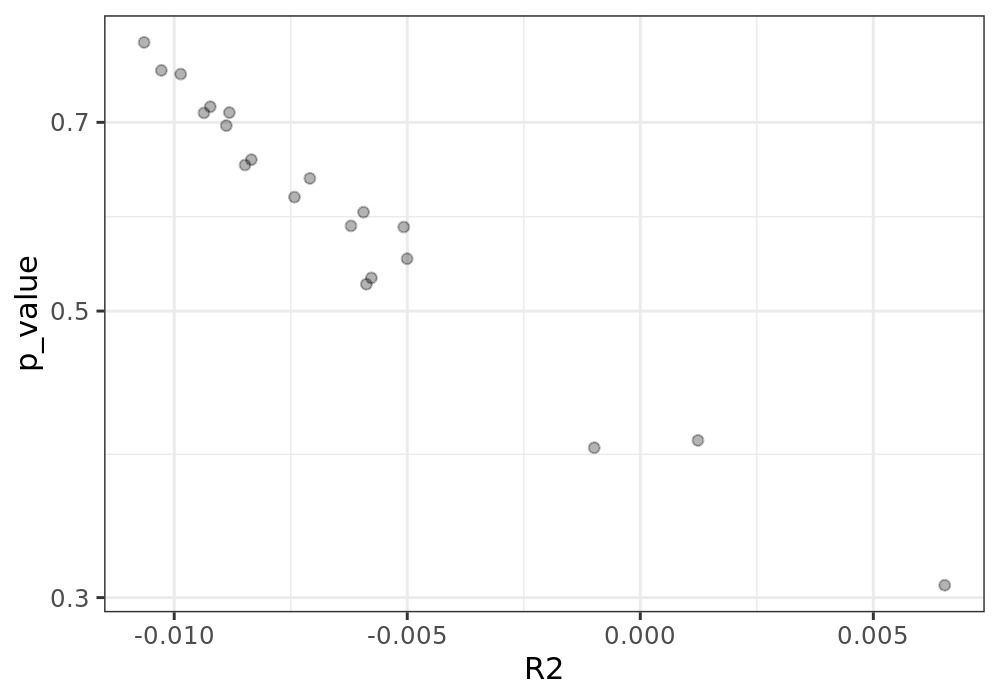

In [163]:
# p-value distribution
p = ggplot(pgls_res, aes(R2, p_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

p.dims(5,3.5)
plot(p)

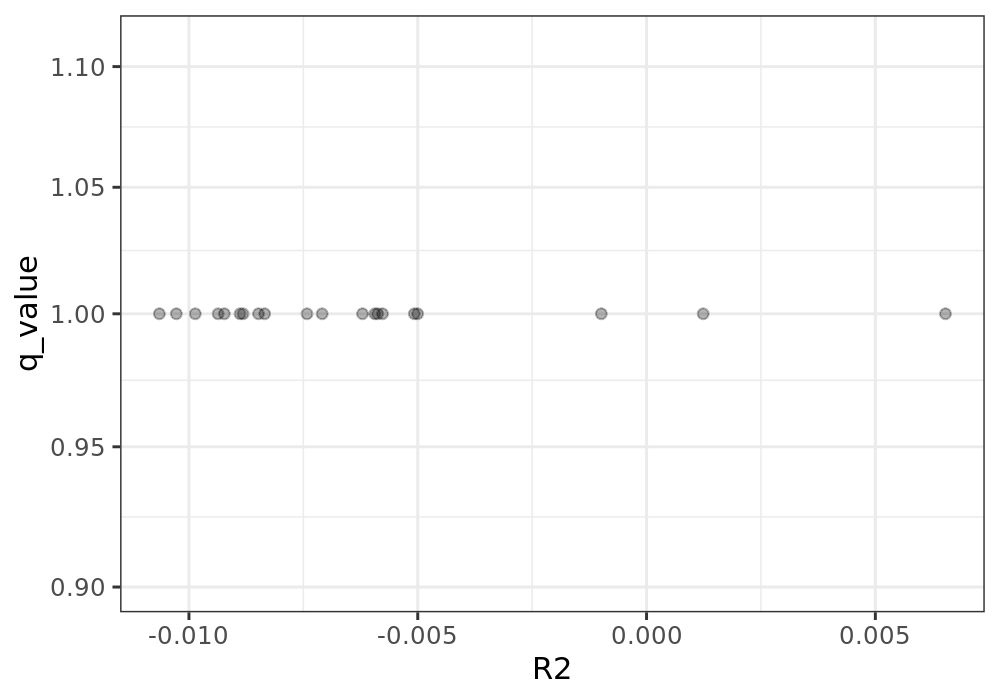

In [164]:
# p-adj-value distribution
p = ggplot(pgls_res, aes(R2, q_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw() 

p.dims(5,3.5)
plot(p)

## Diet

In [123]:
# variables
alpha_div_labels = c('shannon', 'faith_pd')
alpha_div_labels

[1] "shannon"  "faith_pd"

In [124]:
# summary of covariate
metadata %>% .$diet %>% table

.
carnivore herbivore  omnivore 
       39        95        51 

In [125]:
# PGLS
ret = beta_dists %>%
    plyr::llply(pgls_each_dist,
                x = 'diet',
                tree_list = host_tree_l,
                data = PCs,
                threads = threads)

ret = ret %>%
    do.call(rbind, .) %>%
   as.data.frame
ret

,Estimate,std_err,t_value,p_value,R2,x,y,rep,dist
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
diet,-0.36439921,0.11821251,-3.082577,0.002785269,0.09191430,diet,PC1,1,bray_curtis
diet1,-0.03318851,0.09517318,-0.348717,0.728184804,-0.01056761,diet,PC2,1,bray_curtis
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
diet3993,-0.08551951,0.05051417,-1.692981,0.09395694,0.02031415,diet,PC4,100,weighted_unifrac
diet4993,-0.11873133,0.05454092,-2.176922,0.03213326,0.03988723,diet,PC5,100,weighted_unifrac


In [147]:
# formatting results
pgls_res = ret %>%
    group_by(rep) %>%
    mutate(p_value = p_value %>% as.Num,
           q_value = p.adjust(p_value, method='BH')) %>%
    group_by(dist, y) %>%
    summarize(Estimate = mean(Estimate),
              std_err = mean(std_err),
              t_value = mean(t_value),
              p_value = mean(p_value),
              q_value = (length(q_value) - sum(q_value < 0.05)) / length(q_value),
              R2 = mean(R2),
              x = first(x))

pgls_res$p_value %>% summary
pgls_res$q_value %>% summary
pgls_res

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.003272 0.039805 0.111708 0.217494 0.316552 0.784740 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1200  0.8875  1.0000  0.8670  1.0000  1.0000 

dist,y,Estimate,std_err,t_value,p_value,q_value,R2,x
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
bray_curtis,PC1,-0.34859017,0.1279999,-2.7326333,0.01013811,0.48,0.070805199,diet
bray_curtis,PC2,-0.04419615,0.1046622,-0.4260557,0.67627183,1.00,-0.009061136,diet
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
weighted_unifrac,PC4,-0.08302049,0.05339861,-1.552578,0.13998501,1,0.01719178,diet
weighted_unifrac,PC5,-0.10782777,0.05231729,-2.062737,0.04537799,1,0.03697601,diet


### Saving output

In [148]:
# output file name
pgls_res_file = file.path(work_dir, 'pgls_IndD_beta-div_diet.RDS')
pgls_res_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_beta-div_diet.RDS"

In [149]:
# saving
saveRDS(pgls_res, file=pgls_res_file)
cat('File written:', pgls_res_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_beta-div_diet.RDS 


In [150]:
# re-load 
pgls_res = readRDS(pgls_res_file) 
pgls_res %>% dfhead

[1] 20  9


dist,y,Estimate,std_err,t_value,p_value,q_value,R2,x
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
bray_curtis,PC1,-0.34859017,0.12799992,-2.7326333,0.01013811,0.48,0.070805199,diet
bray_curtis,PC2,-0.04419615,0.10466220,-0.4260557,0.67627183,1.00,-0.009061136,diet
bray_curtis,PC3,-0.06142829,0.08636842,-0.7111506,0.49226086,1.00,-0.005157685,diet


In [130]:
send_email('http://127.0.0.1:9805/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/03_modulating_factors/04e_PGLS_IndD_beta-div.ipynb')


Sending email to: nyoungblut@tuebingen.mpg.de



### Summary

In [151]:
# summary
pgls_res$p_value %>% summary_x('p-value')
pgls_res$q_value %>% summary_x('adj p-value')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
p-value,0.003271973,0.03980524,0.1117075,0.2174937,0.316552,0.7847397,0.288,0.118


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
adj p-value,0.12,0.8875,1,0.867,1,1,0.345,0.141


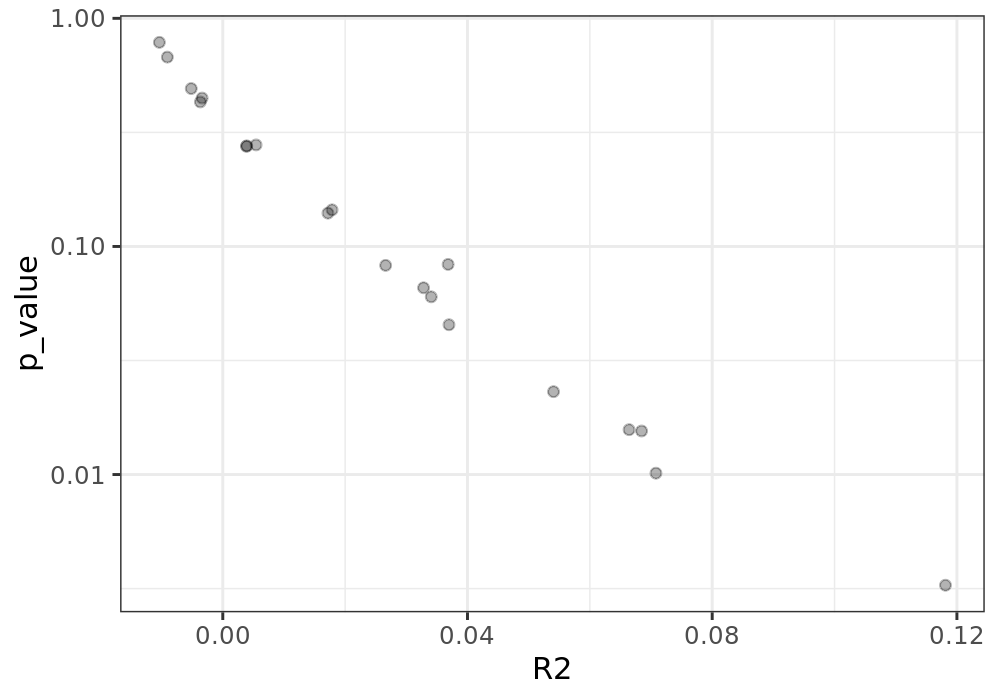

In [152]:
# p-value distribution
p = ggplot(pgls_res, aes(R2, p_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

p.dims(5,3.5)
plot(p)

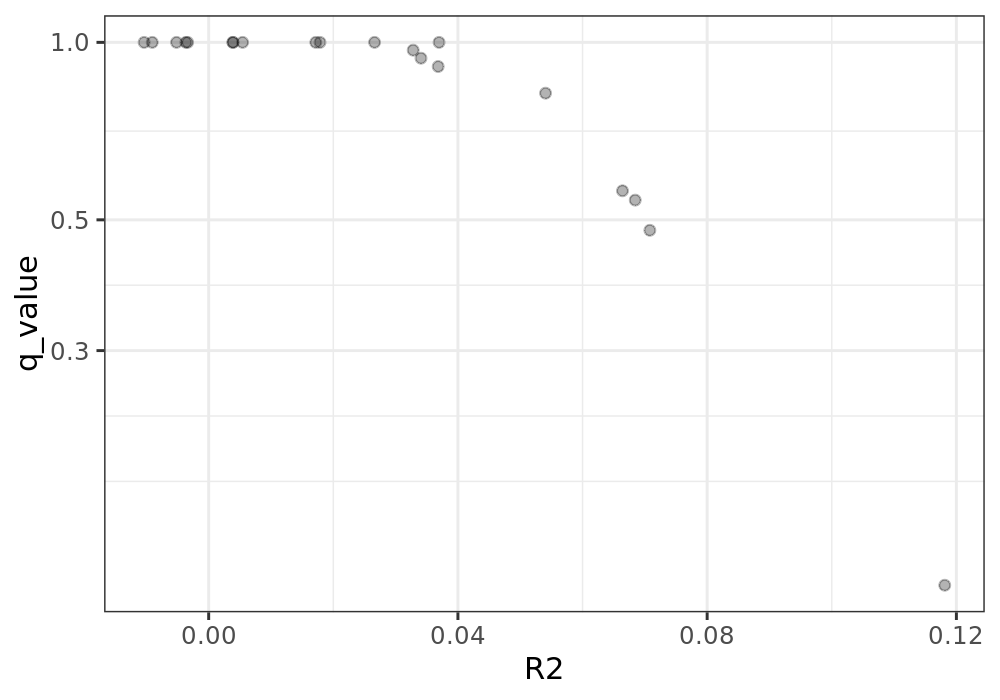

In [153]:
# p-adj-value distribution
p = ggplot(pgls_res, aes(R2, q_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw() 

p.dims(5,3.5)
plot(p)

### significant values

In [154]:
# how many?
pgls_res %>%
    filter(q_value < 0.05) %>%
    .$y %>% unique_n('No. of factors')

No. of unique No. of factors: 0 


# sessionInfo

In [136]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-phy/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] LeyLabRMisc_0.1.5 doParallel_1.0.15 iterators_1.0.12  foreach_1.4.7    
 [5] phyloseq_1.30.0   caper_1.0.1       mvtnorm_1.1-1     MASS_7.3-51.5    
 [9] ade4_1.7-13       ape_5.3           ggplot2_3.2.1     tidyr_1.0.0      
[13] dplyr_0.8.3      

loaded via